<h4> IMPORTING THE REQUIRED LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("Data.csv")

In [3]:
data.head(5).append(data.tail(5))

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0
1999,510,1,2.0,1,5,1,45,0.9,168,6,...,483,754,3919,19,4,2,1,1,1,3


<h4> obtaining the column names

In [4]:
data.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [5]:
import warnings
warnings.filterwarnings('ignore')
numerical_features=data.select_dtypes(include=np.number)
categorical_features=data.select_dtypes(include=np.object)
print("numerical_features: ", numerical_features.shape, numerical_features.columns)
print("categorical_feauters: ", categorical_features.shape, categorical_features.columns)

numerical_features:  (2000, 21) Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')
categorical_feauters:  (2000, 0) Index([], dtype='object')


<h4> UNDERSTANDING THE DATA

In [6]:
data.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


<H4> DROP THE ROWS HAVING THE EMPTY DATA

In [7]:
data.dropna()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [8]:
data. isnull(). sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

<H4> PLOTING CHANGE OF PRICE W.R.T TO EACH AND EVERY COLUMN

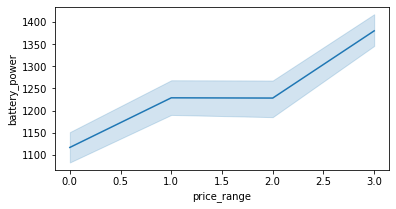

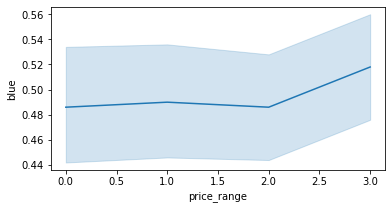

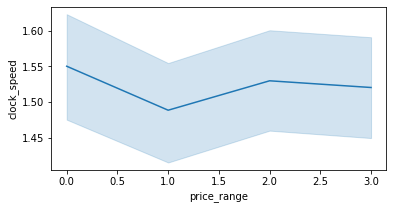

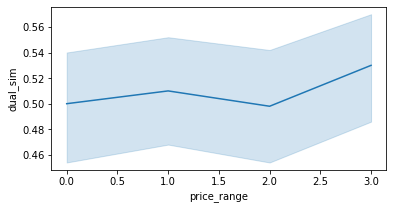

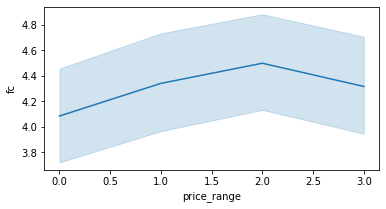

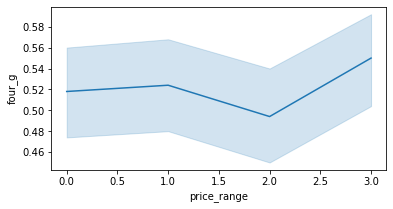

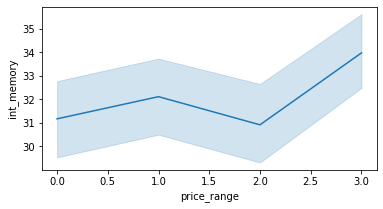

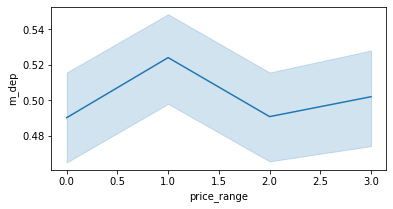

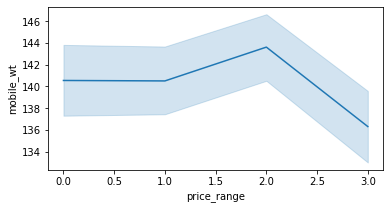

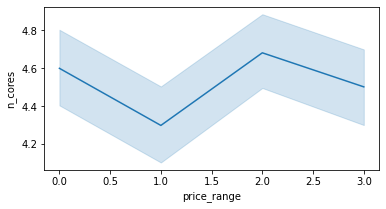

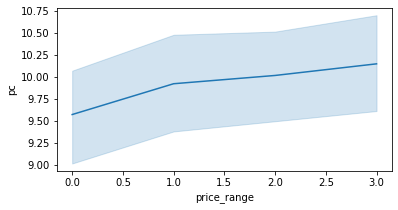

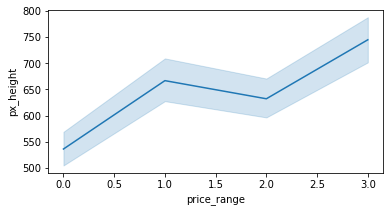

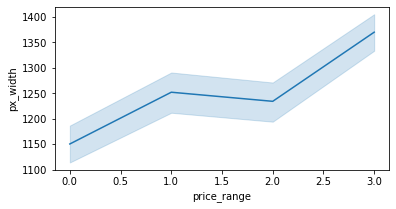

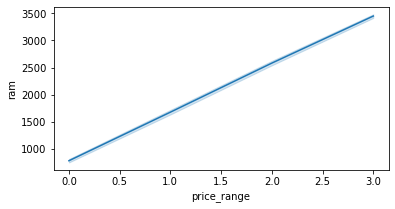

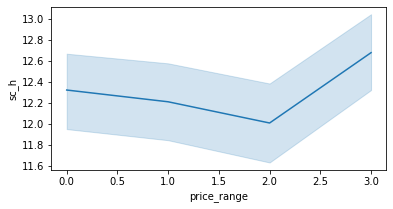

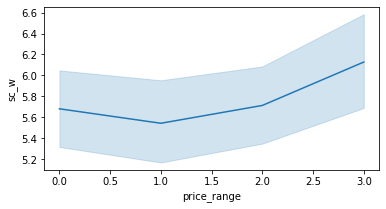

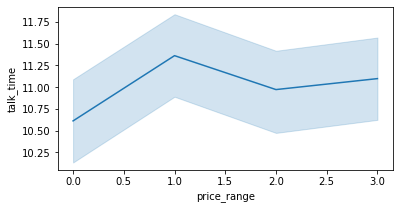

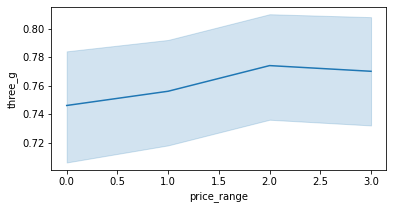

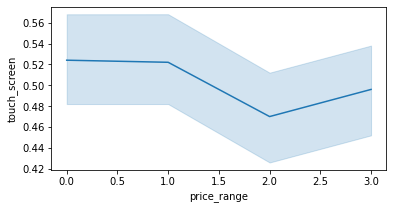

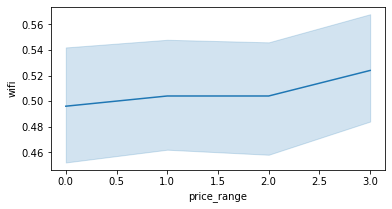

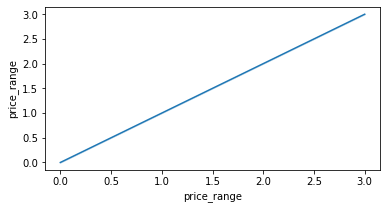

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["figure.figsize"] = (20,8)

def plot(data,y):
    plt.figure(figsize=(6, 3))
    sns.lineplot(data=data, x='price_range', y=y)
    plt.show()
for i in data.columns:
    plot(data, i)


<H4> THE DATA IS SPLITEED INTO TRAINING AND TEST DATA

In [10]:
import sklearn
from sklearn.model_selection import train_test_split
y = data["price_range"]

In [11]:
X_train, X_test, y_train, y_test = train_test_split(data,y,test_size=0.20,random_state=42)


<H4> Logistic regression

In [12]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()

In [13]:
logisticRegr.fit(X_train,y_train)
predictions = logisticRegr.predict(X_test)

In [14]:
score = logisticRegr.score(X_test, y_test)
print("The Accuracy for the given data is: ",score)

The Accuracy for the given data is:  0.6425


In [15]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_test,predictions)
print(cm)

[[79 25  1  0]
 [17 46 21  7]
 [ 0 19 47 26]
 [ 0  2 25 85]]


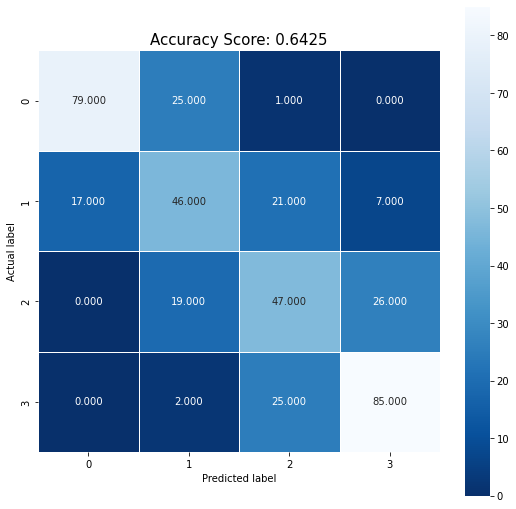

In [16]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

In [17]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[79 25  1  0]
 [17 46 21  7]
 [ 0 19 47 26]
 [ 0  2 25 85]]
              precision    recall  f1-score   support

           0       0.82      0.75      0.79       105
           1       0.50      0.51      0.50        91
           2       0.50      0.51      0.51        92
           3       0.72      0.76      0.74       112

    accuracy                           0.64       400
   macro avg       0.64      0.63      0.63       400
weighted avg       0.65      0.64      0.64       400



# KNN_Algorithm

In [18]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)
predictions = classifier.predict(X_test)
print(metrics.accuracy_score(y_test, predictions))

0.9425


In [19]:
from sklearn.metrics import classification_report, confusion_matrix
cknn = confusion_matrix(y_test, y_pred)
print(cknn)
print(classification_report(y_test, y_pred))

NameError: name 'y_pred' is not defined

In [ ]:

plt.figure(figsize=(9,9))
sns.heatmap(cknn, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
score_knn = metrics.accuracy_score(y_test,y_pred)
all_sample_title = 'Accuracy Score: {0}'.format(score_knn)
plt.title(all_sample_title, size = 15);

In [ ]:
from sklearn.svm import SVC
clf = SVC(kernel='linear')
clf.fit(X_train, y_train)

In [ ]:

clf_rbf = SVC(kernel='rbf')
clf_rbf.fit(X_train, y_train)

In [ ]:
predictions = clf.predict(X_test)
print("Accuracy for Linear Model: ", metrics.accuracy_score(y_test, predictions))

In [ ]:
predictions = clf_rbf.predict(X_test)
print("Accuracy for RBF Model: ", metrics.accuracy_score(y_test, predictions))


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
svml = confusion_matrix(y_test, predictions)
print(svml)
print(classification_report(y_test, predictions))


In [ ]:
plt.figure(figsize=(9,9))
sns.heatmap(svml, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
score_svml = metrics.accuracy_score(y_test,predictions)
all_sample_title = 'Accuracy Score: {0}'.format(score_svml)
plt.title(all_sample_title, size = 15);


Conclusion:
Based on the comparison of the three algorithm techniques it
can be concluded that accuracy of SVM was 97 % accuracy .
which makes it more efficient.